## Decision Tree Classification

In this example, we'll use a diabetes training set to build a decision tree classifier. The goal is to predict if a patient has diabetes or not based on certain clinical attributes.

### Importing our modules

In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

### Importing the data

After importing the data set we will split the data sets into their input (features) and target (label) variables.

In [2]:
# importing the dataset
df = pd.read_csv('/content/diabetes.csv')

df.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#split dataset into features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = df[feature_cols] # Features
y = df.label # Target variable

print('feature vectors -->')
print('rows, cols: {}'.format(X.shape))
print('num of rows: {}'.format(len(X)))
print('')
print('label vector -->')
print('rows,: {}'.format(y.shape))
print('num of rows: {}'.format(len(y)))

feature vectors -->
rows, cols: (768, 7)
num of rows: 768

label vector -->
rows,: (768,)
num of rows: 768


### Splitting the dataset

We'll divide the data into training and testing sets so that once the training of the model is complete, we can evaluate its performance using testing data. Specifically, we're assigning 20% of the data to serve as testing data with remaining 80% used to help train the model. Additionally, you can use random_state to select records randomly. Seeding this with a value ensures reproducibility.

In [4]:
# assign test data size 20%
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size= 0.20, random_state=16)

### Building Decision Tree Model

Although standardization (or scaling) of data is common practice for many machine learning models, it's not required when building a decision tree. Therefore, we can skip to importing the decision tree classifier from sklearn.

In [5]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

### Model Evaluation

Let's estimate how accurately the classifier can predict patients with diabetes. Accuracy can be computed by comparing actual test set values and predicted values.

In [6]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7012987012987013


### Visualizing Decision Trees

One of the advantages of decision trees is the ability to visualize their frameworks. Let's display the tree that we've built.

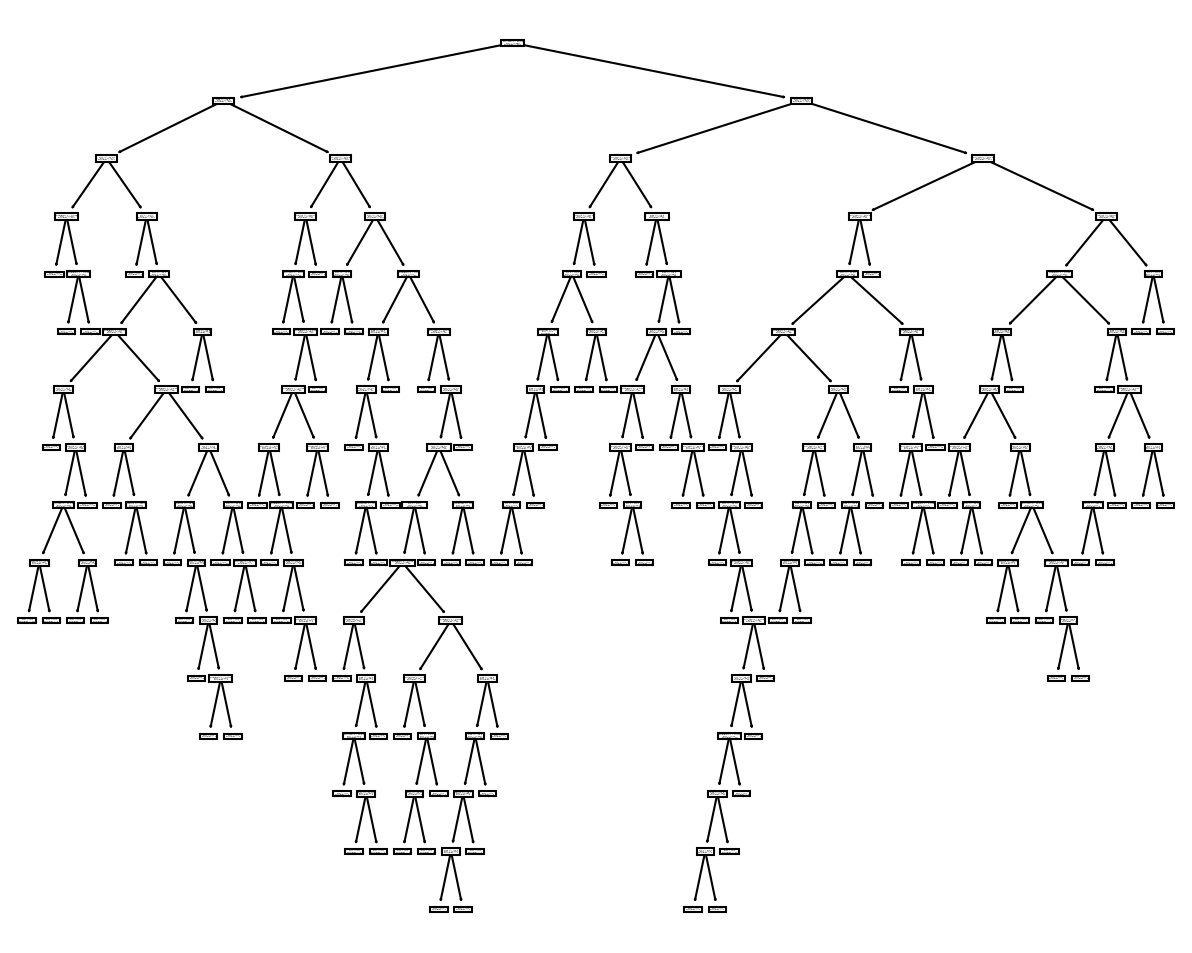

In [7]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,8), dpi=150)
plot_tree(clf, feature_names=feature_cols);

As is obvious, the tree we've built is fairly complex. It goes as deep as 13 levels of branches, making it potentially very prone to overfitting. The sklearn classifier allows samples to have as few as 2 in order to branch out further. Let's see if by making some simple tweeks we can further improve the accuracy while reducing complexity.

In [8]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3) #---adjust the splitting strategy and max levels of branching

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7922077922077922


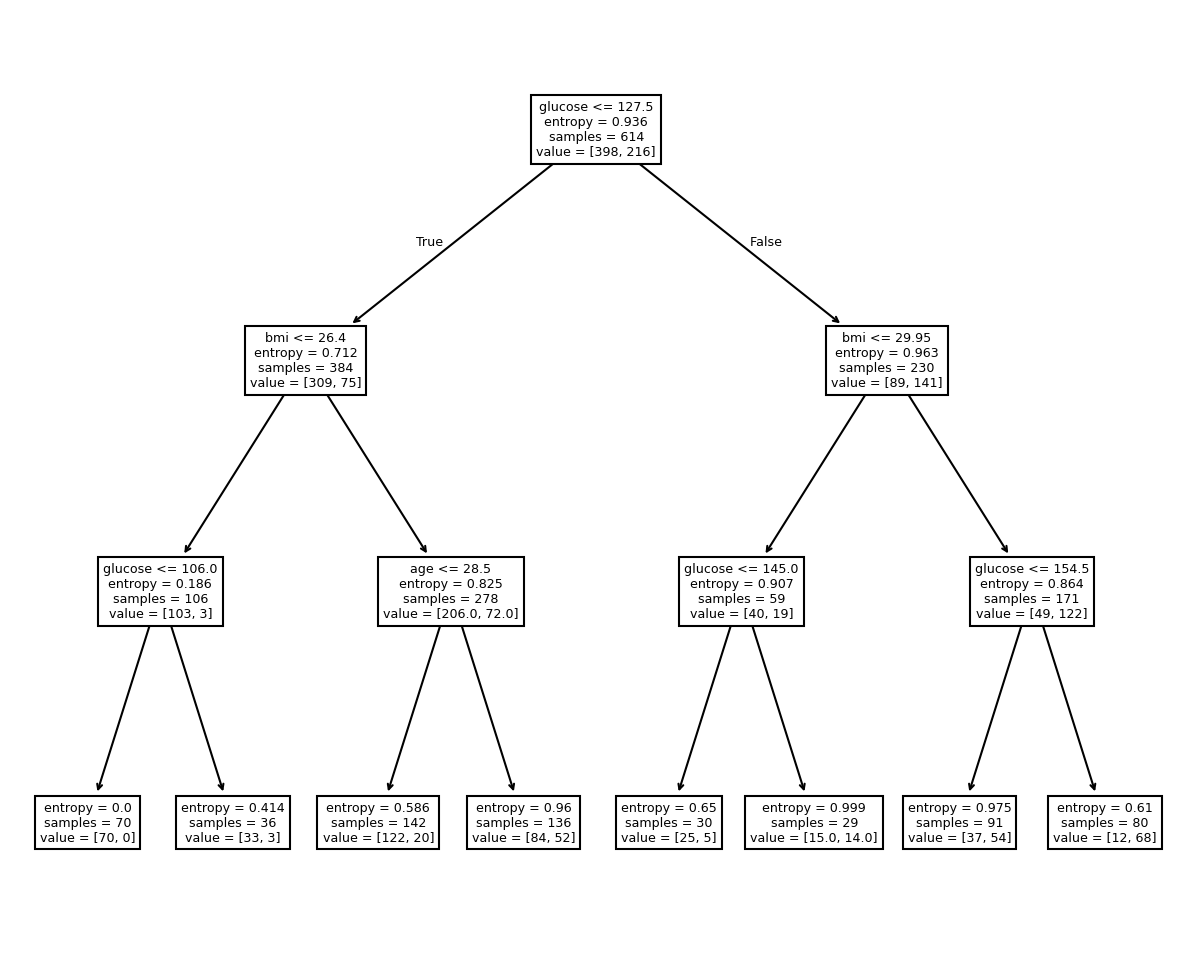

In [9]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,8), dpi=150)
plot_tree(clf, feature_names=feature_cols);

By pruning our tree we were able to boost the accuracy number.

### Confusion Matrix

Let's further evaluate the performance of our model using the confusion matrix to note how it performed against Type I (False Positive) and Type II (False Negative) errors.

Text(0.5, 427.9555555555555, 'Predicted label')

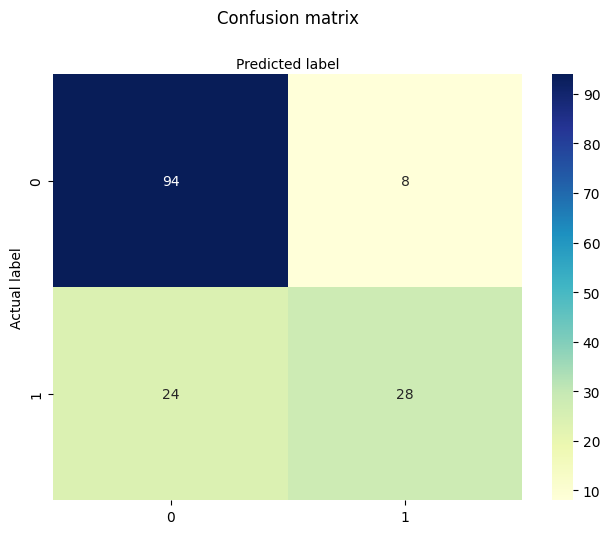

In [10]:
# import the metrics class
from sklearn import metrics

# passing actual and predicted values
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Classification Report for Evaluation Metrics

Let's evaluate the model using a classification_report for accuracy, precision, and recall.

In [11]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.80      0.92      0.85       102
   with diabetes       0.78      0.54      0.64        52

        accuracy                           0.79       154
       macro avg       0.79      0.73      0.75       154
    weighted avg       0.79      0.79      0.78       154



According to the F-1 score, our classification model has an accuracy rate of 79%.

Precision: Measures how many did suffer from diabetes within the total number of those predicted to suffer. Accordingly, when our model predicted patients are going to suffer from diabetes, they actually did 78% of the time.

Recall: This measures how many of the diabetes patients the model is able to identify. Accordingly, our model identified 54% of them.

### ROC Curve

Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.

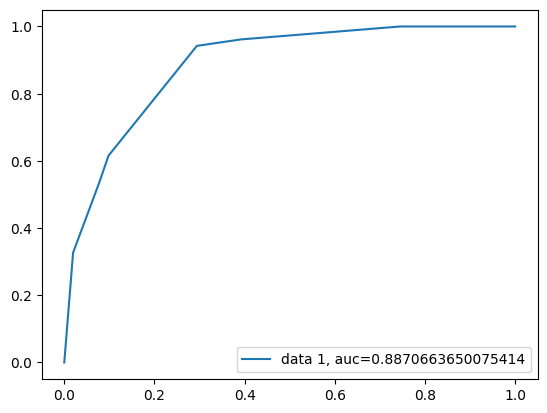

In [12]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

AUC score for the case is 0.89. AUC score 1 represents a perfect classifier, and 0.5 represents a worthless classifier.